# Box 2.2:  Worked example of estimation: chemistry of forested watersheds

Lovett et al. (2000) studied the chemistry of forested watersheds in the Catskill Mountains in New York State. They chose 39 sites (observations) on ﬁrst and second order streams and measured the concentrations of ten chemical variables ($NO_3^-$, total organic $N$, total $N$, $NH_4^-$, dissolved organic $C$, $SO_4^{2-}$, $Cl^-$, $Ca^{2+}$, $Mg^{2+}$, $H^+$), averaged over three years, and four watershed variables (maximum elevation, sample elevation, length of stream, watershed area). We will assume that the 39 sites represent a random sample of possible sites in the central Catskills and will focus on point estimation for location and spread of the populations for two variables, $SO_4^{2-}$ and $Cl^-$, and interval estimation for the population mean of these two var- iables. We also created a modiﬁed version of $SO_4^{2-}$ where we replaced the largest value (72.1 µmol per liter at site BWS6) by an extreme value of 200 µmol per liter to illustrate the robustness of various statistics to outliers. Boxplots (Chapter 4) for both variables are presented in Figure 4.3. Note that $SO_4^{2-}$ has a symmetrical distribution whereas $Cl^-$ is positively skewed with outliers (values very different from rest of sample). Summary statistics for $SO_4^{2-}$ (original and modiﬁed) and $Cl^-$ are presented below.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats

Load data:

In [2]:
lovett = pd.read_csv('../../data/chpt2/lovett.csv', sep=',')

In [3]:
lovett.head()

,STREAM,ELEVATN,SO4,SO4MOD,CL
0,Santa_Cruz,680,50.6,50.6,15.5
1,Colgate,628,55.4,55.4,16.4
2,Halsey,625,56.5,56.5,17.1
3,Batavia_Hi,663,57.5,57.5,16.8
4,Windham_Ri,616,58.3,58.3,18.3


In [4]:
# cut out interessted variables
df = lovett[['SO4', 'SO4MOD', 'CL']]
df.head()

,SO4,SO4MOD,CL
0,50.6,50.6,15.5
1,55.4,55.4,16.4
2,56.5,56.5,17.1
3,57.5,57.5,16.8
4,58.3,58.3,18.3


In [5]:
df.describe()

,SO4,SO4MOD,CL
count,39.000000,39.000000,39.000000
mean,61.923077,65.202564,22.841026
std,5.241558,22.703020,12.383068
min,50.600000,50.600000,13.000000
25%,57.650000,57.650000,16.700000
50%,62.100000,62.100000,20.500000
75%,65.650000,65.650000,23.400000
max,72.100000,200.000000,78.800000


## BoxPlots

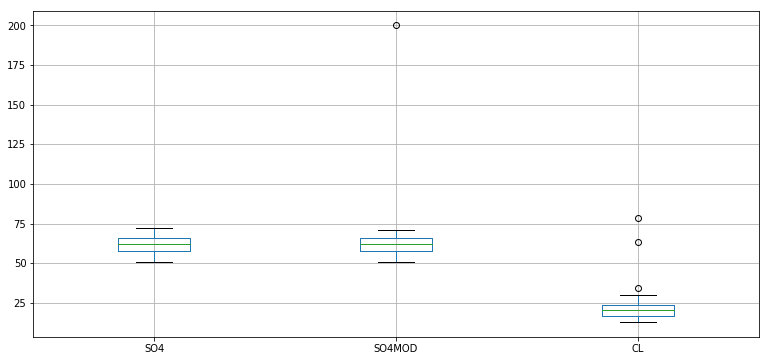

In [34]:
df.boxplot(figsize=(13,6))

## Descriptive Statistics

### Mean

In [7]:
df.mean() # mean

SO4       61.923077
SO4MOD    65.202564
CL        22.841026
dtype: float64

### Median

In [8]:
df.median() # median

SO4       62.1
SO4MOD    62.1
CL        20.5
dtype: float64

### Trimmed mean
https://scipy.github.io/devdocs/generated/scipy.stats.trim_mean.html

In [33]:
df.apply(func=stats.trim_mean, axis=0, args=[0.05])

SO4       61.954054
SO4MOD    61.954054
CL        21.594595
dtype: float64

### Interquantile range

**Via Pandas:** 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [49]:
interpolation = 'linear'
df.quantile(0.75,interpolation=interpolation)- df.quantile(0.25,interpolation=interpolation)

SO4       8.0
SO4MOD    8.0
CL        6.7
dtype: float64

**Via Numpy:**

In [50]:
np.percentile(a = df, q=75, axis=0) - np.percentile(a = df, q=25, axis=0)

array([8. , 8. , 6.7])

**Via Scipy:**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html

In [51]:
from scipy.stats import iqr

In [52]:
print(iqr(df.values, axis=0))

[8.  8.  6.7]


### Standard error of mean (SEM)

**Manual:**

In [53]:
df.std()/np.sqrt(len(df))

SO4       0.839321
SO4MOD    3.635393
CL        1.982878
dtype: float64

**Via Pandas:**

In [54]:
df.sem()

SO4       0.839321
SO4MOD    3.635393
CL        1.982878
dtype: float64

**Via Scipy:**

In [55]:
stats.sem(df)

array([0.83932096, 3.63539261, 1.98287785])

### Confidence Interval

**Manual:**

In [57]:
t_95 = stats.t.ppf(q = 0.975, df=len(df)-1)
sem = stats.sem(df)
m = np.mean(df.values, axis=0)
print(m-(t_95*sem))
print(m+(t_95*sem))

[60.22396047 57.84309651 18.8268993 ]
[63.62219337 72.56203169 26.85515199]


**Via Scipy:**

In [58]:
stats.t.interval(alpha=0.95, df=len(df)-1, loc=np.mean(df, axis=0), scale=stats.sem(df))

(array([60.22396047, 57.84309651, 18.8268993 ]),
 array([63.62219337, 72.56203169, 26.85515199]))

## Bootstrap sampling
Calculated bootstrap estimates for the mean and the median of $SO_4^{2-}$ concentrations, based on 1000 bootstrap samples (n=39) with replacement from
the original sample of 39 sites.

In [73]:
means = []
medians = []
for i in range(10000):
    tmp = np.random.choice(df.SO4, size=39,replace=True)
    means.append(np.mean(tmp))
    medians.append(np.median(tmp))

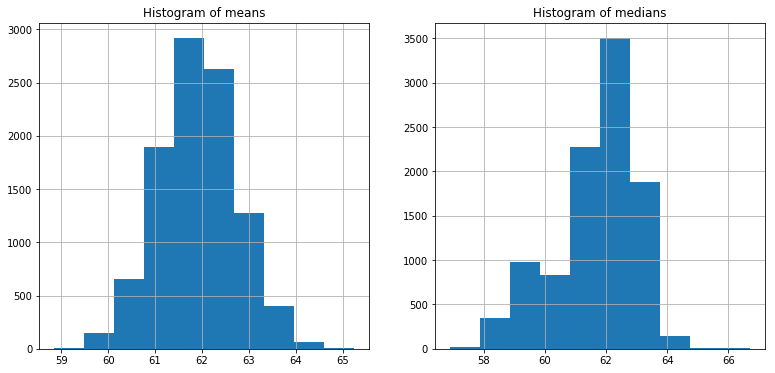

In [91]:
fig, ax = plt.subplots(ncols=2, figsize=(13,6))
_ = ax[0].hist(means)
_ = ax[1].hist(medians)
ax[0].set_title('Histogram of means')
ax[1].set_title('Histogram of medians')
ax[0].grid()
ax[1].grid()

**Mean:**

In [74]:
b_mean = np.mean(means)
print('Bootstrap mean: {}'.format(b_mean))

Bootstrap mean: 61.9187017948718


**Median:**

In [75]:
b_med = np.median(means)
print('Bootstrap median: {}'.format(b_med))

Bootstrap median: 61.912820512820524


**Standard Error of Mean:**  

Standard Error is calculated via the standard deviation of all 10000 trials

In [76]:
b_sem = np.std(means)
print('Bootstrap SEM: {}'.format(b_sem))

Bootstrap SEM: 0.829336353110009


**95% conﬁdence interval:**  

The 95% conﬁdence interval was determined from 250th and 9750th values of the bootstrap statistics arranged in ascending order.

In [77]:
low = np.percentile(a = means, q=2.5, axis=0)
high = np.percentile(a = means, q=97.5, axis=0)
print('95% conf-interval Mean: [{} - {}]'.format(low,high))

95% conf-interval Mean: [60.27429487179488 - 63.54115384615384]


In [78]:
low = np.percentile(a = medians, q=2.5, axis=0)
high = np.percentile(a = medians, q=97.5, axis=0)
print('95% conf-interval Median: [{} - {}]'.format(low,high))

95% conf-interval Median: [58.6 - 63.4]
